## Additional Notebook: Decision Tree (Ungraded)

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import Image  
import pydotplus

#### Downloading Data

In [2]:
!wget https://cdn.extras.talentsprint.com/IOT/Data/iris.csv

--2023-04-18 10:18:18--  https://cdn.extras.talentsprint.com/IOT/Data/iris.csv
Resolving cdn.extras.talentsprint.com (cdn.extras.talentsprint.com)... 172.105.52.210
Connecting to cdn.extras.talentsprint.com (cdn.extras.talentsprint.com)|172.105.52.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4610 (4.5K) [application/octet-stream]
Saving to: ‘iris.csv’

iris.csv            100%[===================>]   4.50K  --.-KB/s    in 0s      

2023-04-18 10:18:21 (459 MB/s) - ‘iris.csv’ saved [4610/4610]



In [3]:
data=pd.read_csv('iris.csv')
data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
X = data.iloc[:,:4].values
Y = data['Name'].values

In [5]:
Y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

#### Encoding the categorical label

In [6]:
enc = LabelEncoder()
## for example encoding y
label_encoder = enc.fit(Y)
y = label_encoder.transform(Y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
enc.inverse_transform(y) # Again inversing the encoding

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

##### Displaying the classes and their equivalent encoded values

In [8]:
print ("Categorical classes:", label_encoder.classes_)
integer_classes = label_encoder.transform(label_encoder.classes_)
print ("Integer classes:", integer_classes)

Categorical classes: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Integer classes: [0 1 2]


### Training a  Classifier

* Iterating the depth ranging from 1 to 4
* Performing decision tree classifier with each depth displaying the graph

#### Training and plotting the tree with Depth=1

In [9]:
# Training and testing set ratio is 67 : 33
X_train, X_test,y_train,y_test = train_test_split(X,Y, test_size=0.33,random_state=42)

##### Training 

In [10]:
clf = DecisionTreeClassifier(max_depth =1,criterion='entropy')
# Fitting the data
clf.fit(X_train,y_train)
# Predicting on test set
print("prediction of test set : \n",clf.predict(X_test))
# accuracy on test set
print("Accuracy score on test set : ",clf.score(X_test,y_test))

prediction of test set : 
 ['Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor']
Accuracy score on test set :  0.68


In [11]:
data.columns.values

array(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Name'],
      dtype=object)

##### Plotting the tree

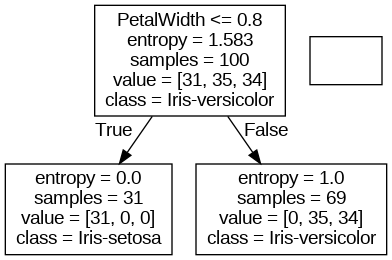

In [12]:
feature_names=data.columns.values[:4]
target_names=np.array(['Iris-setosa','Iris-versicolor','Iris-virginica'])
# Create DOT data
dot_data = export_graphviz(clf, out_file=None, feature_names=feature_names,  class_names=target_names)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
# Show graph
Image(graph.create_png())

#### Training and plotting the tree with Depth=2

##### Training

In [13]:
clf = DecisionTreeClassifier(max_depth =2,criterion='entropy',min_samples_split=2)
# Fitting the data
clf.fit(X_train,y_train)
# Predicting on test set
print("prediction of test set : \n",clf.predict(X_test))
# accuracy on test set
print("Accuracy score on test set : ",clf.score(X_test,y_test))

prediction of test set : 
 ['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica']
Accuracy score on test set :  0.98


##### Plotting the tree

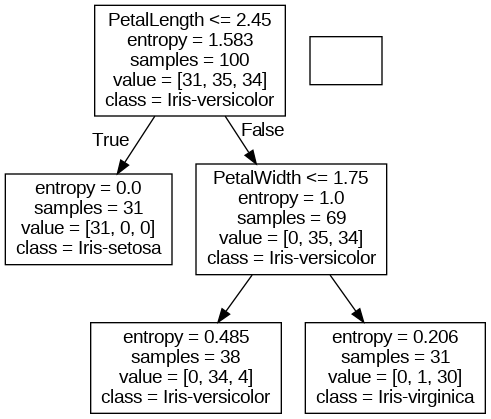

In [14]:
ature_names=data.columns.values[:4]
target_names=np.array(['Iris-setosa','Iris-versicolor','Iris-virginica'])
# Create DOT data
dot_data = export_graphviz(clf, out_file=None, feature_names=feature_names,  class_names=target_names)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
# Show graph
Image(graph.create_png())

#### Training and plotting the tree with Depth=3

##### Training

In [15]:
clf = DecisionTreeClassifier(max_depth =3,criterion='entropy')
# Fitting the data
clf.fit(X_train,y_train)
# Predicting on test set
print("prediction of test set : \n",clf.predict(X_test))
# accuracy on test set
print("Accuracy score on test set : ",clf.score(X_test,y_test))

prediction of test set : 
 ['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica']
Accuracy score on test set :  0.98


##### Plotting the tree

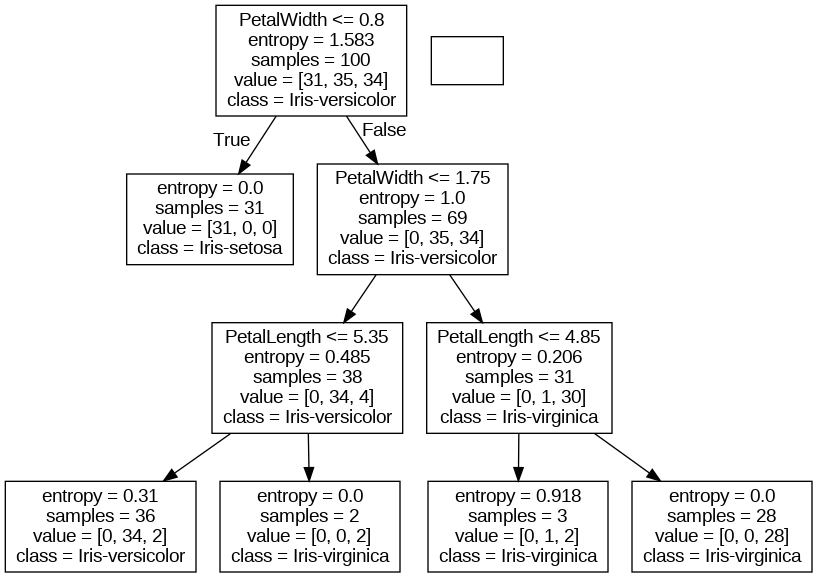

In [16]:
feature_names=data.columns.values[:4]
target_names=np.array(['Iris-setosa','Iris-versicolor','Iris-virginica'])
# Create DOT data
dot_data = export_graphviz(clf, out_file=None, feature_names=feature_names,  class_names=target_names)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
# Show graph
Image(graph.create_png())

#### Training and plotting the tree with Depth=5

##### Training

In [17]:
clf = DecisionTreeClassifier(max_depth =5,criterion='entropy')
# Fitting the data
clf.fit(X_train,y_train)
# Predicting on test set
y_pred=clf.predict(X_test)
print("prediction of test set : \n",y_pred)
# accuracy on test set
print("Accuracy score on test set : ",clf.score(X_test,y_test))

prediction of test set : 
 ['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica']
Accuracy score on test set :  0.96


##### Plotting the tree

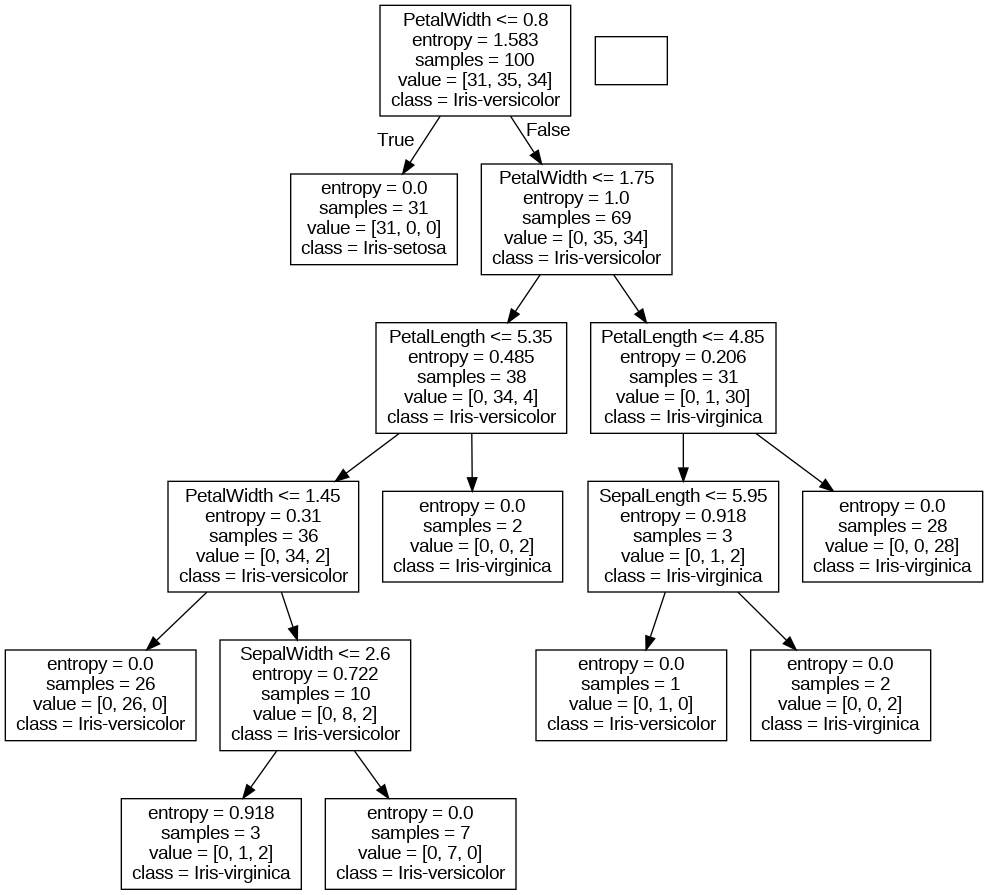

In [18]:
feature_names=data.columns.values[:4]
target_names=np.array(['Iris-setosa','Iris-versicolor','Iris-virginica'])
# Create DOT data
dot_data = export_graphviz(clf, out_file=None, feature_names=feature_names,  class_names=target_names)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
# Show graph
Image(graph.create_png())

### Confusion Matrix

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

In [20]:
df=pd.read_csv('iris.csv')
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
df['Name']!='Iris-versicolor'

0      True
1      True
2      True
3      True
4      True
       ... 
145    True
146    True
147    True
148    True
149    True
Name: Name, Length: 150, dtype: bool

In [22]:
df_b= df.loc[ df['Name']!='Iris-setosa']

In [23]:
X_b = df_b.iloc[:,:4].values
Y_b = df_b['Name'].values

In [24]:
# Training and testing set ratio is 67 : 33
X_train_b, X_test_b,y_train_b,y_test_b = train_test_split(X_b,Y_b, test_size=0.3,random_state=42)

In [25]:
clf = DecisionTreeClassifier(max_depth =1,criterion='entropy')
# Fitting the data
clf.fit(X_train_b,y_train_b)
# Predicting on test set
y_pred_b=clf.predict(X_test_b)
# accuracy on test set
print("Accuracy score on test set : ",clf.score(X_test_b,y_test_b))

Accuracy score on test set :  0.7666666666666667


In [26]:
mat=confusion_matrix(y_test_b, y_pred_b)
mat

array([[16,  1],
       [ 6,  7]])

Text(113.9222222222222, 0.5, 'Predicted Labels')

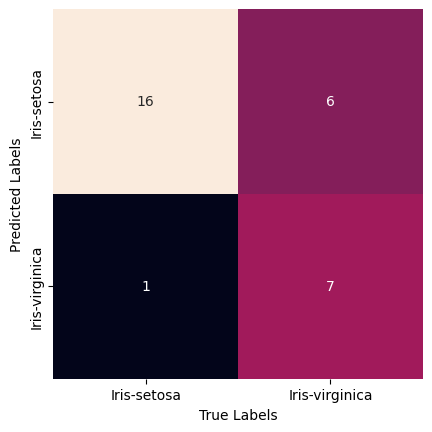

In [27]:
import seaborn as sns
target_names=np.array(['Iris-setosa','Iris-virginica'])
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False,xticklabels=target_names,yticklabels=target_names)
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')

#### Precision-Recall Metrics

* **Precision:** The precision is calculated as the ratio between the number of Positive samples correctly classified to the total number of samples classified as Positive (either correctly or incorrectly)

    Precision = $\mathbf{\frac{TruePositive}{TruePositive + FalsePositive}}$

* **Recall:** Recall tells us how many true positives (points labelled as positive) were recalled or found by our model.

   Recall = $\mathbf{\frac{TruePositive}{TruePositive + FalseNegative}}$

* **F1-score:** precision and recall can be combined into a single score that seeks to balance both concerns, called the F-score or the F-measure.
  
   F1-score = $\mathbf{\frac{2*Precision*Recall}{Precision+Recall}}$

#### Precision

In [28]:
from sklearn.metrics import precision_score
precision_score(y_test_b, y_pred_b, average="macro") 

0.8011363636363636

#### Recall

In [29]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average="macro") 

0.9569444444444445

####F1-score

In [30]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average="macro")

0.9569444444444445